# Table of Contents

- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
    - (see [typecasting of columns](#some-typecasting-of-columns), [initial observations](#-Descriptive-Statistics-about-Data-Set))
- [Data Dictionary](#Data-Dictionary)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [2]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # adding regular expressions for string manipulations later

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat = pd.read_csv('../data/sat_2017.csv')
act = pd.read_csv('../data/act_2017.csv')

#Code:
# in addition to looking at the first 10 rows of information to see if we imported our datasets correctly,
# we also want to get an idea of the datatypes for each column for any initial data cleansing
# using describe will allow for us to get a better understanding of the ranges for each columns if they are numeric

print(act.head(10))
# print(act.info())
# print(act.describe())
print(act.shape)

# print(sat.head(10))
# print(sat.info())
print(sat.describe())
# print(sat.shape)

                  State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2  
(52, 7)
       Evidence-Based R

## Some typecasting of columns
Once we looked at the first 10 rows and got the info for the two datasets, I noticed that the ACT & SAT participation scores were in string formats.  They can be converted into numerics, so I do that below just in case.  From the info method, we find out that the **Composite** column for the ACT dataset has the datatype of object which implies there is a string somewhere in there.  I removed the **'x'** value and casted the column into a float.  

In [4]:
# just making participation into int in case I wanted to compute stuff later
sat['Participation'] = sat['Participation'].map(lambda x: float(x.replace('%',''))/100.)

# need to fix composite score
act['Composite'] = act['Composite'].map(lambda x: float(x.replace('x','')))
act['Participation'] = act['Participation'].map(lambda x: float(x.replace('%',''))/100.)


## Descriptive Statistics about Data Set

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:**

#### 4a. Does the data look complete? 

**Answer:** One of the datasets includes National data while the other does not.  If you were to remove the National scores for the ACT, then the data is complete across both datasets. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer:** For the SAT's the min, max values for each subject is 200-800, total 400-1600.  For the ACT's the min and max values for each subject is 1-36, the composite score is the average of the individual subjects so the min and max value does not change (1-36).  

One issue with the SAT dataset is the min value of the scores is 52 which is not possible.  

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.
There seem to be two errors in the State of Maryland.  One in the SAT Math score and one in the ACT Science score.

In [5]:
sat.loc[20, 'Math'] = 524

# find_Maryland = 
sat.loc[20,'Math']

524

In [6]:
sat.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039
std,0.352766,45.666901,47.121395,92.494812
min,0.020000,482.000000,468.000000,950.000000
25%,0.040000,533.500000,523.500000,1055.500000
50%,0.380000,559.000000,548.000000,1107.000000
75%,0.660000,613.000000,599.000000,1212.000000
max,1.000000,644.000000,651.000000,1295.000000


In [7]:
act.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.651538,20.919231,21.173077,22.001923,21.040385,21.509615
std,0.318325,2.332132,1.963602,2.048672,3.151113,2.002083
min,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,0.310000,19.000000,19.400000,20.475000,19.900000,19.800000
50%,0.680000,20.550000,20.900000,21.700000,21.150000,21.400000
75%,1.000000,23.300000,23.100000,24.125000,22.525000,23.600000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [8]:
print(act)

                   State  Participation  English  Math  Reading  Science  \
0               National           0.60     20.3  20.7     21.4     21.0   
1                Alabama           1.00     18.9  18.4     19.7     19.4   
2                 Alaska           0.65     18.7  19.8     20.4     19.9   
3                Arizona           0.62     18.6  19.8     20.1     19.8   
4               Arkansas           1.00     18.9  19.0     19.7     19.5   
5             California           0.31     22.5  22.7     23.1     22.2   
6               Colorado           1.00     20.1  20.3     21.2     20.9   
7            Connecticut           0.31     25.5  24.6     25.6     24.6   
8               Delaware           0.18     24.1  23.4     24.8     23.6   
9   District of Columbia           0.32     24.4  23.5     24.9     23.5   
10               Florida           0.73     19.0  19.4     21.0     19.4   
11               Georgia           0.55     21.0  20.9     22.0     21.3   
12          

In [9]:
act.loc[21,'Science'] = 23.2

act.loc[21,'Science']

23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
print(sat.dtypes)
print(act.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


What did you learn?

Do any of them seem odd?
Which ones are not as they should be?

**Answer:** Earlier in the notebook participation was cast as a string type, but for both ACT and SAT they have both been changed to a float instead.  I preferred to see participation as a float where the range was between 0 and 1 so they are converted as such.  

6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.

Define a function that will allow you to convert participation rates to an appropriate numeric type. Use map or apply to change these columns in each dataframe.

- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [11]:
def lower_cols(list_of_columns,prefix):
    new_list = []
    for each0 in list_of_columns.columns:
        each = each0.lower()
        new_word = prefix + re.sub('[^A-Za-z0-9]+','_',each)
#         print(new_word)
        new_list.append(new_word) # list.extend treats each string as iterable character
        # append treats each string as element! 
    return new_list
        
sat_colnames = lower_cols(sat,'sat_')
act_colnames = lower_cols(act,'act_')

In [12]:
sat.columns = sat_colnames
sat.columns
sat.dtypes

sat_state                                  object
sat_participation                         float64
sat_evidence_based_reading_and_writing      int64
sat_math                                    int64
sat_total                                   int64
dtype: object

In [13]:
act.columns=act_colnames
act.columns
act.dtypes

act_state             object
act_participation    float64
act_english          float64
act_math             float64
act_reading          float64
act_science          float64
act_composite        float64
dtype: object

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**sat_state**|*str*|SAT|Regional Marker| 
|**sat_participation**|*float*|SAT|Percentage of graduating class that participated in ACT/SAT Testing|
|**sat_evidence_based_reading_and_writing**|*int*|SAT|SAT reading and writing section score|
|**sat_math**|*int*|SAT|SAT math section score|
|**sat_total**|*int*|SAT|SAT total score - Summation of Math and Reading Scores| 
|**act_state**|*str*|ACT|Regional Marker| 
|**act_participation**|*float*|ACT|Percentage of graduating class that participated in ACT/SAT Testing|
|**act_english**|*float*|ACT|ACT English Score| 
|**act_math**|*float*|ACT|ACT Math Score| 
|**act_reading**|*float*|ACT|ACT Reading Score| 
|**act_science**|*float*|ACT|ACT Science Score| 
|**act_composite**|*float*|ACT|ACT Total (Composite) Score - Average of individual Scores|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [14]:
# overwrite act ds or create new one without State = National
act.drop(act[(act['act_state']=='National')].index, axis = 0,inplace = True)
# act1.shape()

#check shapes
act.shape

(51, 7)

In [15]:
#Code:
test_new_df = pd.merge(sat,act,left_on='sat_state',right_on='act_state')

## just testing a bunch of stuff and changing labels for later on

test_new_df.head()

test_new_df.columns = lower_cols(test_new_df, '2017_')


test_new_df['state']=test_new_df['2017_sat_state']

test_new_df.drop(columns=['2017_sat_state','2017_act_state'],inplace = True)

test_new_df= test_new_df[['state', '2017_sat_participation', '2017_sat_evidence_based_reading_and_writing',
       '2017_sat_math', '2017_sat_total', '2017_act_participation',
       '2017_act_english', '2017_act_math', '2017_act_reading',
       '2017_act_science', '2017_act_composite' ]]

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [16]:
#code
test_new_df.to_csv('combined_2017.csv',sep='|')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [17]:
act_2018 = pd.read_csv('../data/2018act.csv') 
sat_2018 = pd.read_csv('../data/2018sat.csv')

sat_2018.columns = lower_cols(sat_2018,'2018_sat_')
act_2018.columns = lower_cols(act_2018,'2018_act_')

In [18]:
sat_2018['2018_sat_participation']=sat_2018['2018_sat_participation'].map(lambda x: float(x.replace('%',''))/100.)

act_2018['2018_act_participation'] = act_2018['2018_act_participation'].map(lambda x: float(x.replace('%',''))/100.)

act_2018.info()
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
2018_act_state            52 non-null object
2018_act_participation    52 non-null float64
2018_act_composite        52 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
2018_sat_state                                 52 non-null object
2018_sat_participation                         52 non-null float64
2018_sat_evidence_based_reading_and_writing    52 non-null int64
2018_sat_math                                  52 non-null int64
2018_sat_total                                 52 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [19]:
ds_2018 = pd.merge(sat_2018,act_2018,left_on='2018_sat_state',right_on='2018_act_state')
ds_2018['state']=ds_2018['2018_sat_state']
ds_2018.drop(columns=['2018_sat_state','2018_act_state'],inplace = True)
final_ds = pd.merge(test_new_df,ds_2018,on='state')
final_ds.to_csv('final.csv',sep='|')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [20]:
final_ds.describe()

,2017_sat_participation,2017_sat_evidence_based_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_evidence_based_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.386000,570.860000,558.660000,1129.620000,0.659200,20.862000,21.13600,21.956000,21.410000,21.466000,0.443000,569.120000,560.020000,1129.140000,0.623200,21.454000
std,0.345602,44.385146,45.839832,89.913085,0.321107,2.324307,1.97399,2.046317,1.731962,2.004241,0.370704,44.619772,48.668177,92.944137,0.341141,2.111312
min,0.020000,503.000000,492.000000,996.000000,0.080000,16.300000,18.00000,18.100000,18.200000,17.800000,0.020000,505.000000,486.000000,997.000000,0.070000,17.700000
25%,0.040000,535.250000,524.000000,1057.000000,0.310000,19.000000,19.40000,20.425000,19.925000,19.800000,0.042500,536.250000,525.000000,1065.000000,0.277500,19.925000
50%,0.340000,559.500000,549.500000,1107.500000,0.710000,20.550000,20.90000,21.700000,21.300000,21.400000,0.455000,558.000000,547.000000,1102.500000,0.660000,21.050000
75%,0.650000,613.500000,601.000000,1214.000000,1.000000,23.100000,23.00000,23.875000,22.975000,23.400000,0.745000,617.250000,604.000000,1225.000000,1.000000,23.650000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.30000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [21]:
def mean(data):
    return float(sum(data) / len(data))

def variance(data):
    mu = mean(data)
    return mean([(x - mu) ** 2 for x in data])

def stddev(data):
    return variance(data)**0.5

def std(dataframe, column_name):
    mu = dataframe[column_name].mean()
    var = sum([((x-mu)**2) for x in dataframe[column_name]])/len(dataframe)
    std = var**0.5
    return std

In [22]:
print(std(final_ds,'2017_sat_total'))

print(np.std(final_ds['2017_sat_total']))

# compare to python built in functions
print(stddev(final_ds['2017_sat_total']))

89.00941298536914
89.00941298536914
89.00941298536914


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [23]:
sd = {each: std(final_ds,each) for each in final_ds.select_dtypes(include=[np.number]).columns}

In [24]:
sd

{'2017_act_composite': 1.9840977798485642,
 '2017_act_english': 2.3009467616613812,
 '2017_act_math': 1.9541504548012678,
 '2017_act_participation': 0.3178794740149165,
 '2017_act_reading': 2.025750231395766,
 '2017_act_science': 1.7145553359399048,
 '2017_sat_evidence_based_reading_and_writing': 43.9390532442382,
 '2017_sat_math': 45.37911854586864,
 '2017_sat_participation': 0.3421286307808805,
 '2017_sat_total': 89.00941298536914,
 '2018_act_composite': 2.090091864009809,
 '2018_act_participation': 0.33771254048376703,
 '2018_sat_evidence_based_reading_and_writing': 44.17132101262085,
 '2018_sat_math': 48.179036935165065,
 '2018_sat_participation': 0.3669782009874701,
 '2018_sat_total': 92.01000163025755}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:**
It did not match up with the pandas describe, but it did match up with the built in np.std() function. The assumption is that because there are many float operations within the function that rounding can impact the final computation.  

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [25]:
#code
# SAT Participation top 5/bottom 5 2017 & 2018
final_ds['2017_sat_participation'].sort_values(ascending=False).head().index # [6, 7, 21, 28, 18]
print('2017 Most Engaged SAT States')
print(final_ds.loc[[6, 7, 21, 28, 18],'state'])
final_ds['2017_sat_participation'].sort_values(ascending=True).head().index #[33, 23, 14, 24, 43]
print('2017 Least Engaged SAT States')
print(final_ds.loc[[33, 23, 14, 24, 43],'state'])
final_ds['2018_sat_participation'].sort_values(ascending=False).head().index #[11, 6, 7, 21, 18]
print('2018 Most Engaged SAT States')
print(final_ds.loc[[11, 6, 7, 21, 18],'state'])
final_ds['2018_sat_participation'].sort_values(ascending=True).head().index #[33, 49, 40, 26, 48]
print('2018 Least Engaged SAT States')
print(final_ds.loc[[33, 49, 40, 26, 48],'state'])
# ACT Participation top 5/bottom 5 2017 & 2018
final_ds['2017_act_participation'].sort_values(ascending=False).head().index #[49, 35, 3, 5, 16]
print('2017 Most Engaged ACT States')
print(final_ds.loc[[49, 35, 3, 5, 16],'state'])
final_ds['2017_act_participation'].sort_values(ascending=True).head().index #[18, 7, 28, 38, 37]
print('2017 Least Engaged ACT States')
print(final_ds.loc[[18, 7, 28, 38, 37],'state'])
final_ds['2018_act_participation'].sort_values(ascending=False).head().index #[49, 35, 3, 16, 17]
print('2018 Most Engaged ACT States')
print(final_ds.loc[[49, 35, 3, 16, 17],'state'])
final_ds['2018_act_participation'].sort_values(ascending=True).head().index #[18, 38, 28, 7, 37]
print('2018 Least Engaged ACT States')
print(final_ds.loc[[18, 38, 28, 7, 37],'state'])

2017 Most Engaged SAT States
6       Connecticut
7          Delaware
21         Michigan
28    New Hampshire
18            Maine
Name: state, dtype: object
2017 Least Engaged SAT States
33    North Dakota
23     Mississippi
14            Iowa
24        Missouri
43            Utah
Name: state, dtype: object
2018 Most Engaged SAT States
11          Idaho
6     Connecticut
7        Delaware
21       Michigan
18          Maine
Name: state, dtype: object
2018 Least Engaged SAT States
33    North Dakota
49         Wyoming
40    South Dakota
26        Nebraska
48       Wisconsin
Name: state, dtype: object
2017 Most Engaged ACT States
49     Wyoming
35    Oklahoma
3     Arkansas
5     Colorado
16    Kentucky
Name: state, dtype: object
2017 Least Engaged ACT States
18            Maine
7          Delaware
28    New Hampshire
38     Rhode Island
37     Pennsylvania
Name: state, dtype: object
2018 Most Engaged ACT States
49      Wyoming
35     Oklahoma
3      Arkansas
16     Kentucky
17    Louisia

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

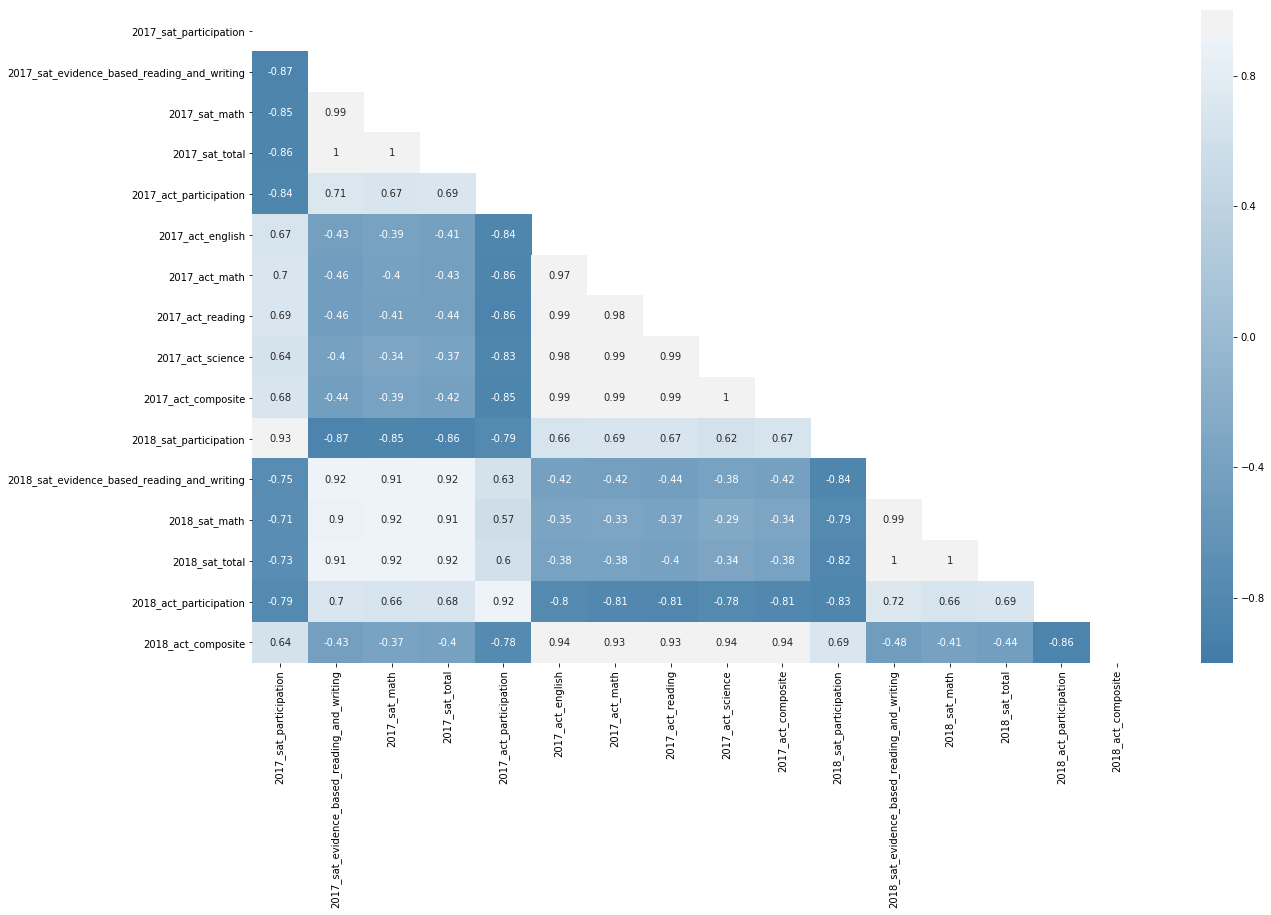

In [26]:
# cmap = sns.palplot(sns.cubehelix_palette(8))

plt.figure(figsize=(20,12))
# sns.dark_palette("palegreen", as_cmap=True)
corr = final_ds.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask, cmap = sns.diverging_palette(240, 10, n = 13, as_cmap=True),
            center = True,
            annot = True,
            vmin=-1,
            vmax=1);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [27]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, figsize):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows

    fig, ax = plt.subplots(nrows = nrows, ncols = 2, figsize = figsize) # You'll want to specify your figsize
          
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = 'c') # feel free to add more settings
#         plt.grid(True)
        # Set titles, labels, etc here for each subplot
        # you can also just ax[i].set_title(list_of_titles[i])
    for enum, xlabel in enumerate(list_of_xlabels): 
        ax[enum].set_xlabel(xlabel, fontsize = 12)
        ax[enum].set_ylabel('Frequency', fontsize = 12)
    for enu, title in enumerate(list_of_titles):
        ax[enu].set_title(title, fontsize = 16)


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

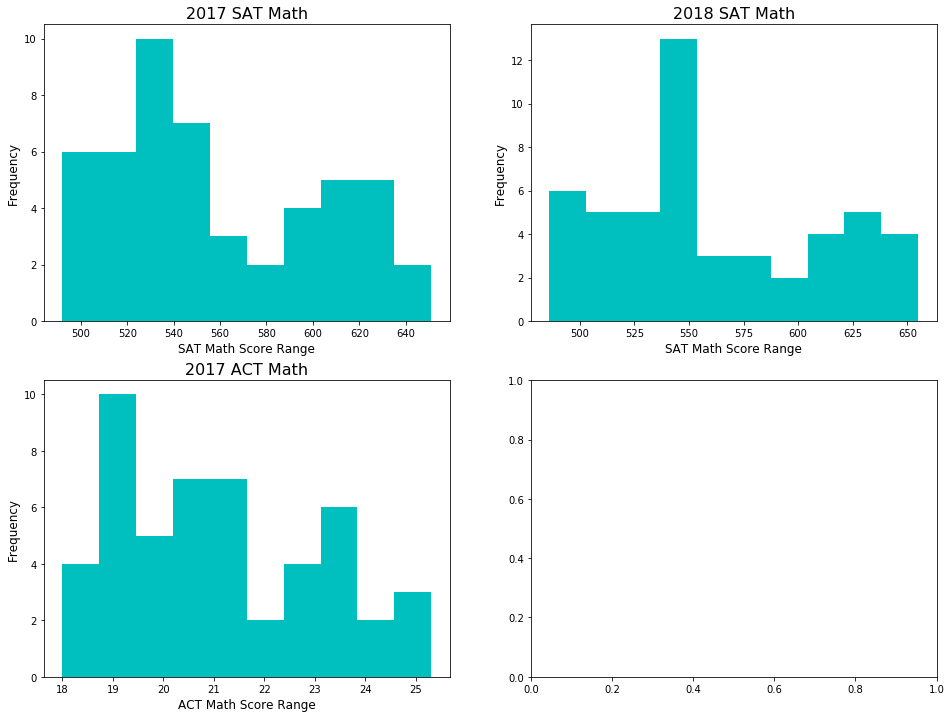

In [28]:
subplot_histograms(final_ds,['2017_sat_math','2018_sat_math','2017_act_math']
                           ,['2017 SAT Math','2018 SAT Math','2017 ACT Math']
                           ,['SAT Math Score Range','SAT Math Score Range','ACT Math Score Range'],(16,12))

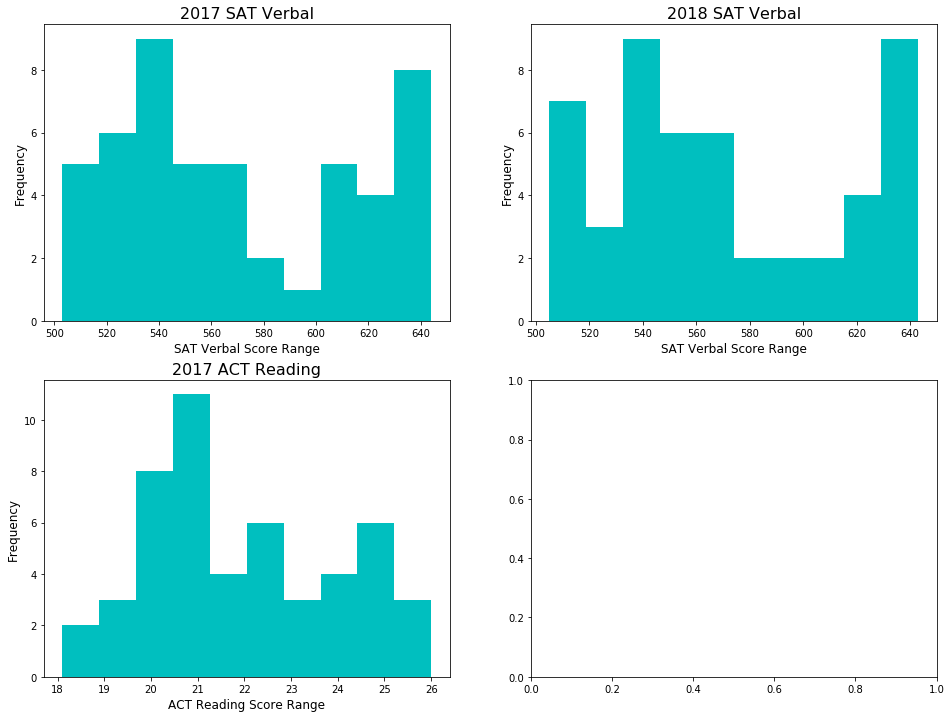

In [29]:
subplot_histograms(final_ds,['2017_sat_evidence_based_reading_and_writing','2018_sat_evidence_based_reading_and_writing','2017_act_reading']
                           ,['2017 SAT Verbal','2018 SAT Verbal','2017 ACT Reading']
                           ,['SAT Verbal Score Range','SAT Verbal Score Range','ACT Reading Score Range'],(16,12))

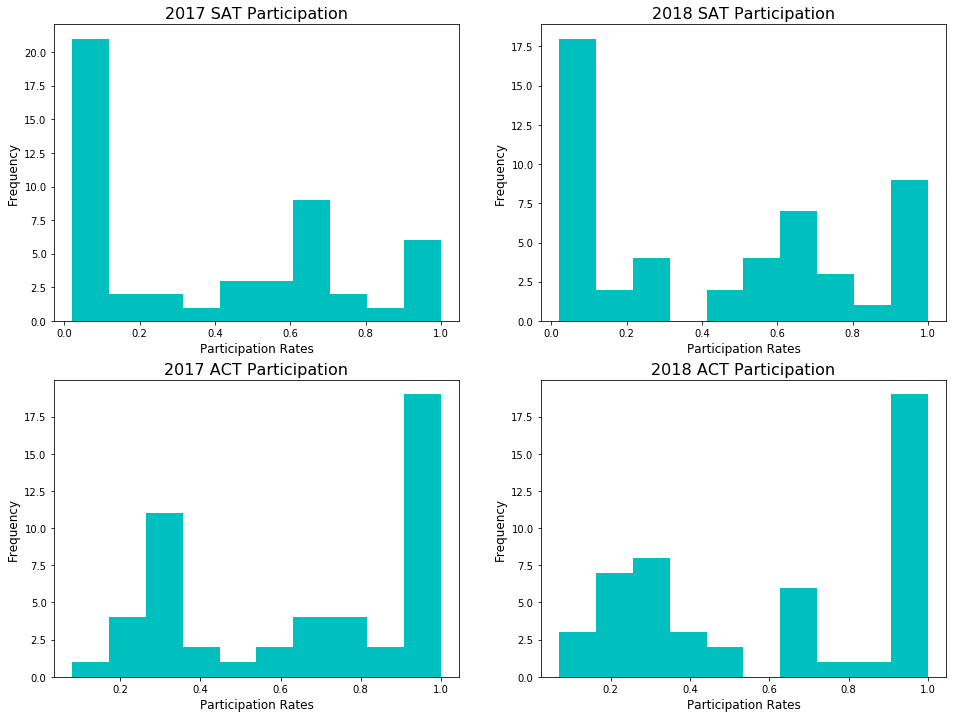

In [30]:
# Code
subplot_histograms(final_ds,['2017_sat_participation','2018_sat_participation','2017_act_participation','2018_act_participation']
                           ,['2017 SAT Participation','2018 SAT Participation','2017 ACT Participation','2018 ACT Participation']
                           ,['Participation Rates','Participation Rates','Participation Rates','Participation Rates'],(16,12))

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


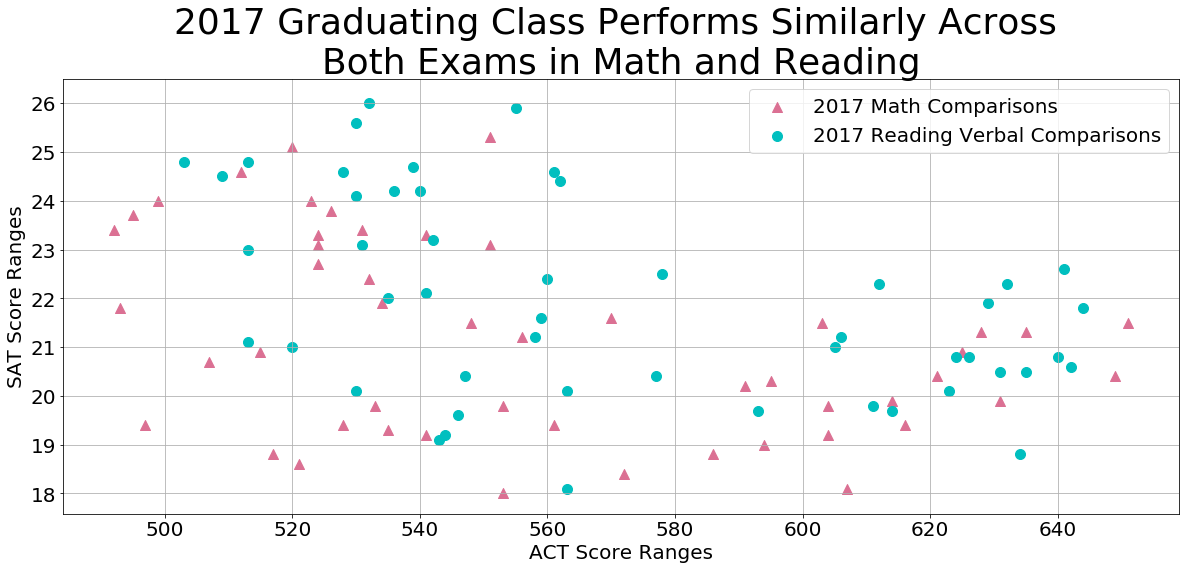

In [31]:
# Code
plt.figure(figsize = (20,8))
plt.grid(True)
# plt.text(10,8,fontsize = 36)
a = plt.scatter(final_ds['2017_sat_math'],final_ds['2017_act_math'], color = 'palevioletred', marker = '^', s =100) # ,s = 20)
b = plt.scatter(final_ds['2017_sat_evidence_based_reading_and_writing'],final_ds['2017_act_reading'], color = 'c', marker = 'o', s =100) #,s = 20)
plt.title('2017 Graduating Class Performs Similarly Across \nBoth Exams in Math and Reading', fontsize = 36)
plt.legend((a,b),
           ('2017 Math Comparisons', '2017 Reading Verbal Comparisons'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=20)
plt.xticks(fontsize = 20) #, rotation = 90)
plt.xlabel('ACT Score Ranges',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('SAT Score Ranges',fontsize = 20)
plt.savefig('2017_SAT_Math_Verbal.png')

Text(0, 0.5, 'SAT Score Ranges')

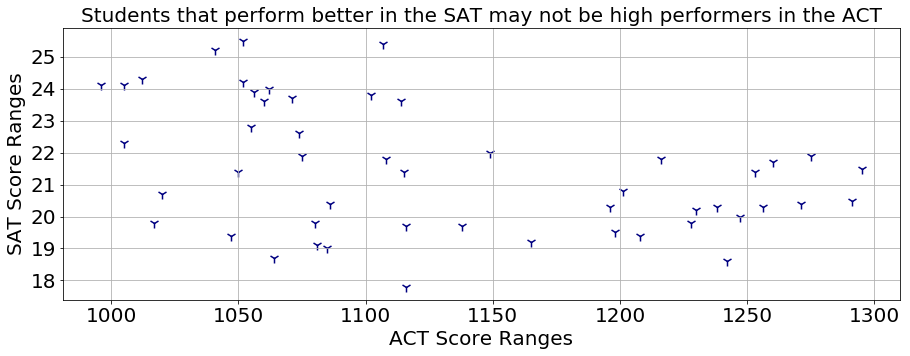

In [32]:
plt.figure(figsize = (15,5))
plt.grid(True)
plt.scatter(final_ds['2017_sat_total'],final_ds['2017_act_composite'], color = 'navy', marker = '1', s= 100)
plt.title('Students that perform better in the SAT may not be high performers in the ACT', fontsize = 20)
# plt.legend((a,b),
#            ('2017 Math Comparisons', '2017 Reading Verbal Comparisons'),
#            scatterpoints=1,
#            loc='upper right',
#            ncol=1,
#            fontsize=20)
plt.xticks(fontsize = 20) #, rotation = 90)
plt.xlabel('ACT Score Ranges',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('SAT Score Ranges',fontsize = 20)

Text(0, 0.5, '2018 SAT Score Ranges')

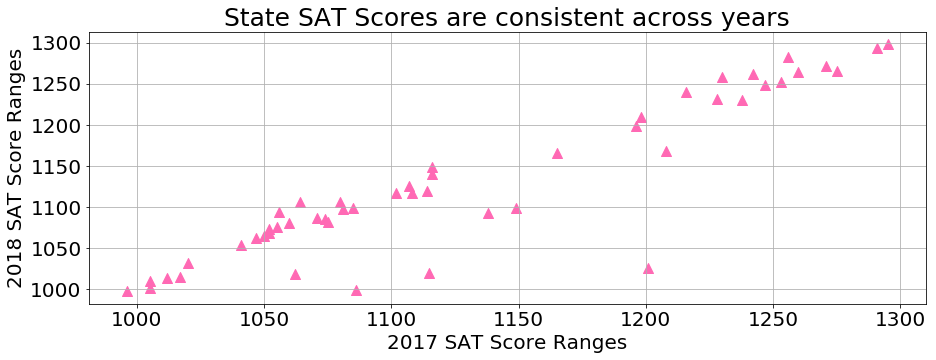

In [33]:
plt.figure(figsize = (15,5))
plt.grid(True)
plt.scatter(final_ds['2017_sat_total'],final_ds['2018_sat_total'], color = 'hotpink', marker = '^', s=100)
plt.title('State SAT Scores are consistent across years', fontsize = 25)
# plt.legend((a,b),
#            ('2017 Math Comparisons', '2017 Reading Verbal Comparisons'),
#            scatterpoints=1,
#            loc='upper right',
#            ncol=1,
#            fontsize=20)
plt.xticks(fontsize = 20) #, rotation = 90)
plt.xlabel('2017 SAT Score Ranges',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('2018 SAT Score Ranges',fontsize = 20)

Text(0, 0.5, '2018 ACT Score Ranges')

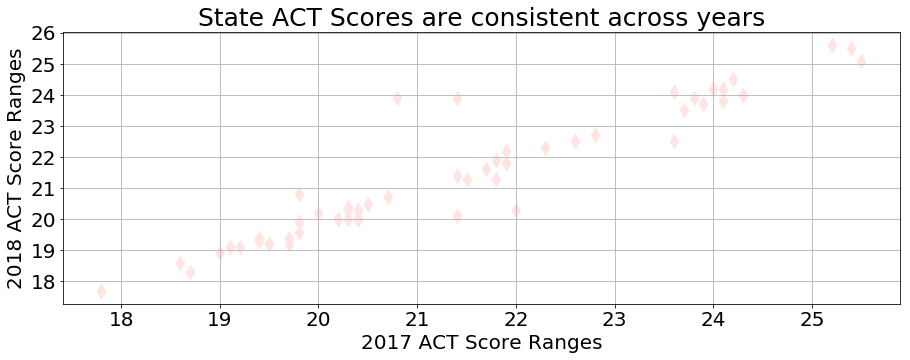

In [34]:
plt.figure(figsize = (15,5))
plt.grid(True)
plt.scatter(final_ds['2017_act_composite'],final_ds['2018_act_composite'], color = 'mistyrose',marker = 'd',s=100)
plt.title('State ACT Scores are consistent across years', fontsize = 25)
# plt.legend((a,b),
#            ('2017 Math Comparisons', '2017 Reading Verbal Comparisons'),
#            scatterpoints=1,
#            loc='upper right',
#            ncol=1,
#            fontsize=20)
plt.xticks(fontsize = 20) #, rotation = 90)
plt.xlabel('2017 ACT Score Ranges',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('2018 ACT Score Ranges',fontsize = 20)


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

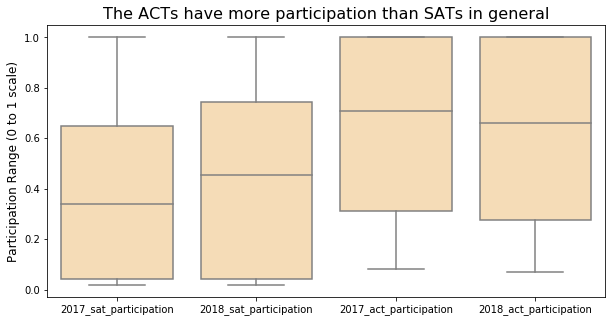

In [35]:
plt.figure(figsize = (10,5))
# plt.grid(True)
sns.boxplot(data=final_ds[['2017_sat_participation','2018_sat_participation','2017_act_participation','2018_act_participation']], color = 'navajowhite')
plt.title('The ACTs have more participation than SATs in general', fontsize = 16)
plt.ylabel('Participation Range (0 to 1 scale)', fontsize = 12)
plt.savefig('SAT_ACT_Participation_Comparison.png')

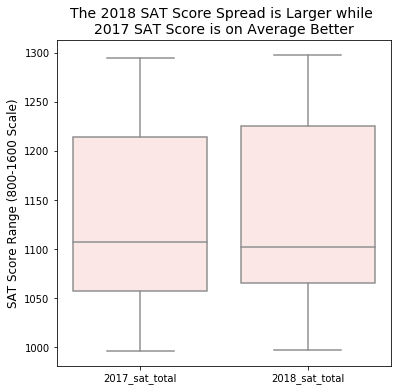

In [36]:
plt.figure(figsize = (6,6))
sns.boxplot(data=final_ds[['2017_sat_total','2018_sat_total']], color = 'mistyrose')
plt.title('The 2018 SAT Score Spread is Larger while \n2017 SAT Score is on Average Better', fontsize = 14)
plt.ylabel('SAT Score Range (800-1600 Scale)', fontsize = 12)
plt.savefig('2017_2018_SAT_Total_Comparison.png')

Text(0, 0.5, 'SAT Individual Score Range (400-800 Scale)')

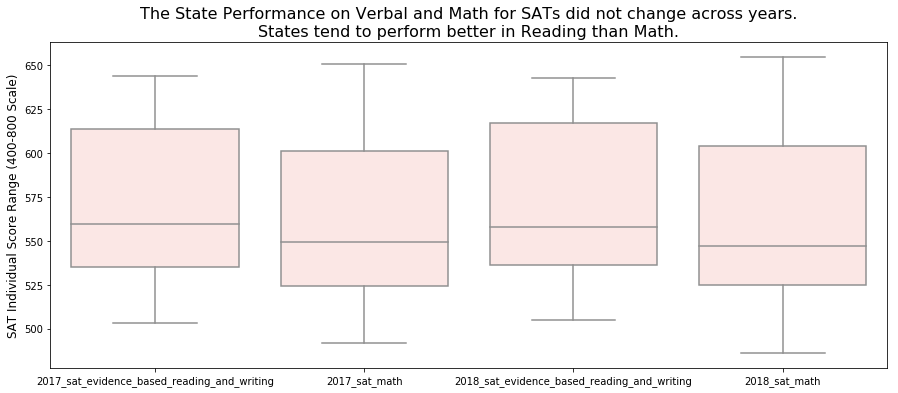

In [37]:
plt.figure(figsize = (15,6))
sns.boxplot(data=final_ds[['2017_sat_evidence_based_reading_and_writing', '2017_sat_math','2018_sat_evidence_based_reading_and_writing', '2018_sat_math',]], color = 'mistyrose');
plt.title('The State Performance on Verbal and Math for SATs did not change across years.\nStates tend to perform better in Reading than Math.', fontsize = 16)
plt.ylabel('SAT Individual Score Range (400-800 Scale)', fontsize = 12)

Text(0, 0.5, 'ACT Individual Score Range (16-36 Scale)')

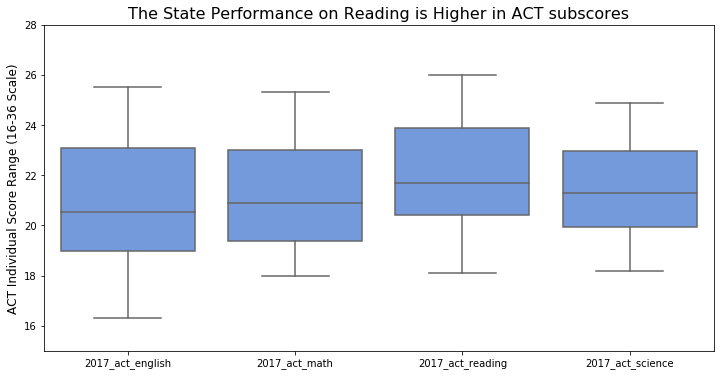

In [38]:
# Code
plt.figure(figsize = (12,6))
plt.ylim(15, 28)
sns.boxplot(data=final_ds[['2017_act_english','2017_act_math', '2017_act_reading', '2017_act_science']], color = 'cornflowerblue');
plt.title('The State Performance on Reading is Higher in ACT subscores', fontsize = 16)
plt.ylabel('ACT Individual Score Range (16-36 Scale)', fontsize = 12)

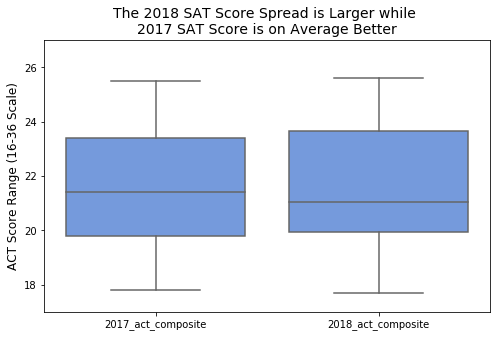

In [39]:
# Code
plt.figure(figsize = (8,5))
plt.ylim(17, 27)
sns.boxplot(data=final_ds[['2017_act_composite','2018_act_composite']], color = 'cornflowerblue');
plt.title('The 2018 SAT Score Spread is Larger while \n2017 SAT Score is on Average Better', fontsize = 14)
plt.ylabel('ACT Score Range (16-36 Scale)', fontsize = 12)
plt.savefig('2017_2018_ACT_Composite_Comparison.png')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

No more additional plots here

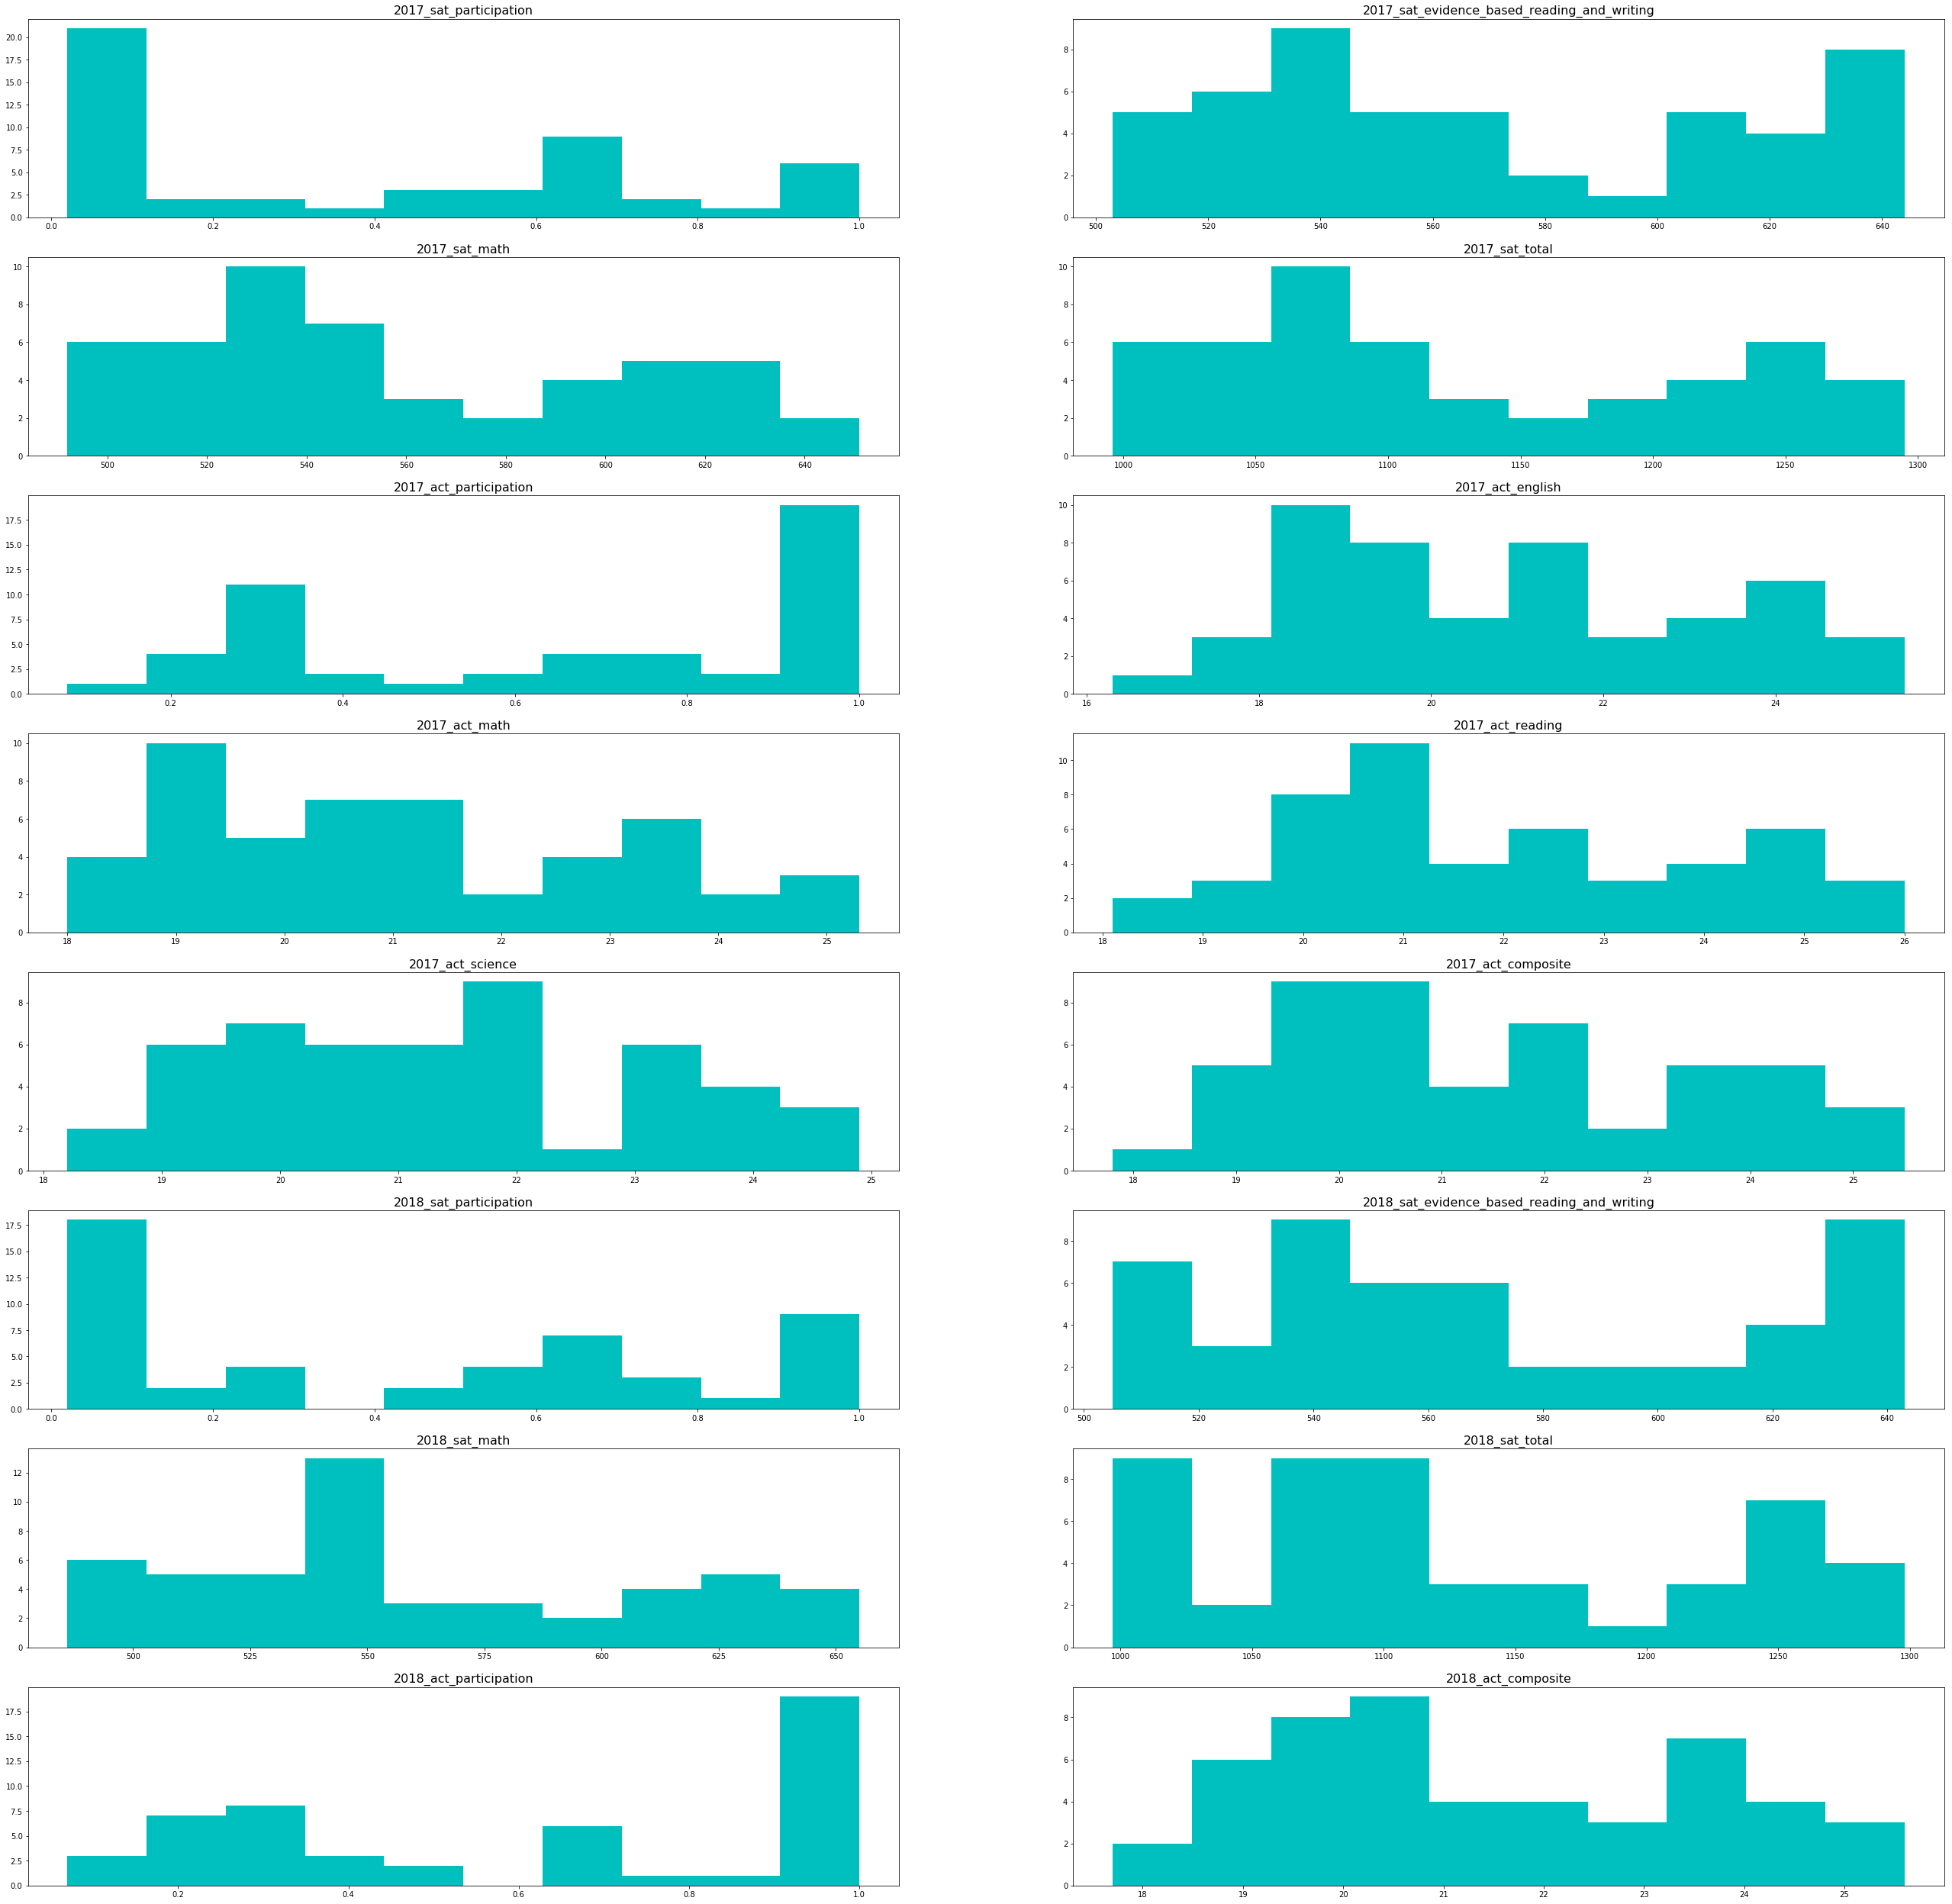

In [40]:
# generate a bunch of histograms

final_ds.columns

subplot_histograms(final_ds,['2017_sat_participation',
       '2017_sat_evidence_based_reading_and_writing', '2017_sat_math',
       '2017_sat_total', '2017_act_participation', '2017_act_english',
       '2017_act_math', '2017_act_reading', '2017_act_science',
       '2017_act_composite', '2018_sat_participation',
       '2018_sat_evidence_based_reading_and_writing', '2018_sat_math',
       '2018_sat_total', '2018_act_participation', '2018_act_composite'],
                   ['2017_sat_participation',
       '2017_sat_evidence_based_reading_and_writing', '2017_sat_math',
       '2017_sat_total', '2017_act_participation', '2017_act_english',
       '2017_act_math', '2017_act_reading', '2017_act_science',
       '2017_act_composite', '2018_sat_participation',
       '2018_sat_evidence_based_reading_and_writing', '2018_sat_math',
       '2018_sat_total', '2018_act_participation', '2018_act_composite'],[], (45,45))

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

**Answer:**

The distributions should be normally distributed, but due the sample size being so small all the distributions are a bit wonky. 

|attribute|distribution shape|mean|min|max|
|---|---|---|---|---|
|2017_sat_participation|SAT participation is very left skewed |0.386000|0.020000|1.000000|
|2017_sat_evidence_based_reading_and_writing|Bimodal with peaks at 540, 620|570.860000|503.000000|644.000000|
|2017_sat_math|Bimodal with peaks at 530, 620|558.660000|492.000000|651.000000|
|2017_sat_total|Bimodal with peaks at 1075, 1250|1129.620000|996.000000|1295.000000|
|2017_act_participation|ACT participation is very skewed to the right|0.659200|0.080000|1.000000|
|2017_act_english|The distribution looks multimodal |20.862000|16.300000|25.500000|
|2017_act_math|The distribution looks multimodal with skew to the left|21.13600|18.00000|25.30000|
|2017_act_reading|The distribution looks multimodal with skew to the left|21.956000|18.100000|26.000000|
|2017_act_science|The distribution looks multimodal with skew to the left|20.982000|18.200000|24.900000|
|2017_act_composite|The distribution looks multimodal with skew to the left|21.466000|17.800000|25.500000|
|2018_sat_participation|SAT participation is very left skewed |0.443000|0.020000|1.000000|
|2018_sat_evidence_based_reading_and_writing|Distribution looks very U-shaped|569.120000|505.000000|643.000000|
|2018_sat_math|SAT math score is uniformly with a spike around 545|560.020000|486.000000|655.000000|
|2018_sat_total|SAT score does not really have a shape|1129.140000|997.000000|1298.000000|	
|2018_act_participation|ACT participation is very skewed to the right|0.623200|0.070000|1.000000|
|2018_act_composite|ACT 2018 Composite Score has bimodal behavior with peaks at 20 and 23.5|21.454000|17.700000|25.600000|

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: For the data we have which is only on 50 states across 2 years no.  Perhaps if we were to take the means of each county within a state and use those values as our sample, we would get closer to a normal distribution.  Currently, the data we sampled has bimodal behaviors.  

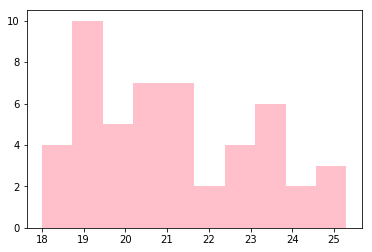

In [41]:
plt.hist(final_ds['2017_act_math'],color='pink',bins=10);

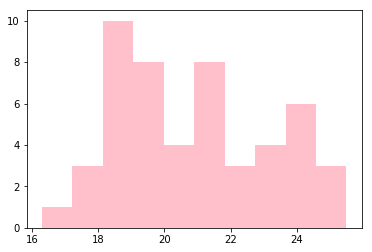

In [42]:
plt.hist(final_ds['2017_act_english'],color='pink',bins=10);

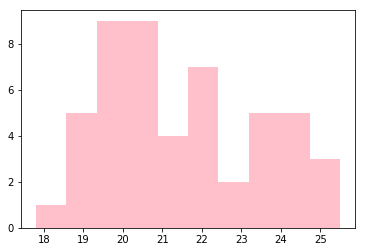

In [43]:
plt.hist(final_ds['2017_act_composite'],color='pink',bins=10);

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:** The CLT is not holding for Math, reading, or the scores because the sample size is too small.  

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

In [44]:
np.corrcoef(final_ds['2017_sat_participation'],final_ds['2017_act_participation'])

array([[ 1.        , -0.83947072],
       [-0.83947072,  1.        ]])

**Answer:** The problem with taking the correlations for these two columns is that on the state level the participation rate is computed based on the all graduating high school students.  There is a possibility that the graduation rate in each state is quite varied but once averaged over the whole state the participation rate can be skewed or trends can be averaged out.  

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

**Answer:** It is not appropriate to compare SAT and ACT math scores because the range and scales do not line up.  If there was a good way to convert the scores on to the same range then it would be more reasonable to compare the math scores across the two exams.  

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [48]:
# final_ds['state']

CT = final_ds[final_ds['state'] == 'Connecticut']
FL = final_ds[final_ds['state']=='Florida']
ND = final_ds[final_ds['state']=='North Dakota']

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West V

In [55]:
# see which schools in what areas value SAT scores more 
# similarly with ACT scores
# which states have more in state students?
# Look into Connecticut, Florida, North Dakota
CT
FL
ND

,state,2017_sat_participation,2017_sat_evidence_based_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_evidence_based_reading_and_writing,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
8,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.97,522,493,1015,0.66,19.9


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Additional data that I would like to have would be demographic data along with county results for SAT and ACT testing.  I believe high test scores are more likely to be correlated with wealth due to the resource availability to study for exams and additionally pay for multiple exams.  For myself, the key take aways are that you cannot always just rely on data to give you insights, but instead look at other factors that can drive the data to look a certain way.  For any of the states that have lower participation rates, College Board can work with the particular state to provide free exams once a year or free test preparations.  The ACT seems to have working relationships with most states with the exception of TX,OR, and the Northeastern region.  